# Scikit Learn workflow introduction:

In [91]:
import numpy as np
import pandas as pd
import sklearn

heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [92]:
# Create X -> features matrix
X = heart_disease.drop("target", axis=1)

# Create y -> labels
y = heart_disease["target"]

In [93]:
from sklearn.ensemble import RandomForestClassifier

# Choose right model and hyperparameters
clf = RandomForestClassifier(n_estimators=100)

# Keeping default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [94]:
# Fit model to training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [95]:
clf.fit(X_train, y_train);

In [96]:
# Make a prediction
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [97]:
y_test

197    0
280    0
284    0
64     1
127    1
      ..
227    0
152    1
236    0
226    0
124    1
Name: target, Length: 61, dtype: int64

In [98]:
# Evaluate the model on the training and test data
clf.score(X_train, y_train)

1.0

In [99]:
clf.score(X_test, y_test)

0.819672131147541

In [100]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

classification_report(y_test, y_preds)

'              precision    recall  f1-score   support\n\n           0       0.77      0.85      0.81        27\n           1       0.87      0.79      0.83        34\n\n    accuracy                           0.82        61\n   macro avg       0.82      0.82      0.82        61\nweighted avg       0.82      0.82      0.82        61\n'

In [101]:
confusion_matrix(y_test, y_preds)

array([[23,  4],
       [ 7, 27]], dtype=int64)

In [102]:
accuracy_score(y_test, y_preds)

0.819672131147541

In [103]:
# Improve model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators.")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test)*100}")

Trying model with 10 estimators.
Model accuracy on test set: 80.32786885245902
Trying model with 20 estimators.
Model accuracy on test set: 81.9672131147541
Trying model with 30 estimators.
Model accuracy on test set: 77.04918032786885
Trying model with 40 estimators.
Model accuracy on test set: 80.32786885245902
Trying model with 50 estimators.
Model accuracy on test set: 81.9672131147541
Trying model with 60 estimators.
Model accuracy on test set: 80.32786885245902
Trying model with 70 estimators.
Model accuracy on test set: 81.9672131147541
Trying model with 80 estimators.
Model accuracy on test set: 81.9672131147541
Trying model with 90 estimators.
Model accuracy on test set: 80.32786885245902


In [104]:
# Save model
import pickle

pickle.dump(clf, open("random_forest_model.pkl", "wb"))

In [105]:
# Load model
loaded_model = pickle.load(open("random_forest_model.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8032786885245902

# 1. Getting the data ready

In [106]:
# Three main things we have to do:
# 1. split data into features and labels (usually X and y)
# 2. fill or removing missing values
# 3. convert non-numerical values to numerical values (usually done with encoding)

In [107]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [108]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [109]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [110]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [111]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [112]:
# Converting data to numbers
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [113]:
len(car_sales)

1000

In [114]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [115]:
# Split data into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [116]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

# Will not work because we need to convert values to numbers
model = RandomForestRegressor()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [117]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [118]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [119]:
# Another way for converting data to numbers
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [120]:
# Refitting the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [121]:
model.score(X_test, y_test)

0.3235867221569877

In [122]:
# In a newer version of Scikit-Learn (0.23+), the OneHotEncoder class was upgraded to be able to handle None & NaN values.
print(sklearn.__version__)

1.5.1


In [123]:
# Dealing with missing values in data
# 1. Fill them with some value (imputation)
# 2. Remove the samples with missing data altogether

In [124]:
car_sales_extended_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_extended_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [125]:
# Checking missing values
car_sales_extended_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [126]:
# Create X & y
X = car_sales_extended_missing.drop("Price", axis=1)
y = car_sales_extended_missing["Price"]

In [127]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [128]:
car_sales_extended_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [129]:
# Option 1 : Filling missing data with pandas

# Older method of doing inplace
# car_sales_extended_missing["Make"].fillna("missing", inplace=True)
# car_sales_extended_missing["Colour"].fillna("missing", inplace=True)
# car_sales_extended_missing["Doors"].fillna(4, inplace=True)
# car_sales_extended_missing["Odometer (KM)"].fillna(car_sales_extended_missing["Odometer (KM)"].mean(), inplace=True)

# Newer method of doing inplace
car_sales_extended_missing.fillna({"Make": "missing"}, inplace=True)
car_sales_extended_missing.fillna({"Colour": "missing"}, inplace=True)
car_sales_extended_missing.fillna({"Doors": 4}, inplace=True)
car_sales_extended_missing.fillna({"Odometer (KM)": car_sales_extended_missing["Odometer (KM)"].mean()}, inplace=True)

In [130]:
# Rechecking missing values after filling them
car_sales_extended_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [131]:
# Remove rows with missing price values
car_sales_extended_missing.dropna(inplace=True)

In [132]:
car_sales_extended_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [133]:
len(car_sales_extended_missing)

950

In [134]:
# Create X & y
X = car_sales_extended_missing.drop("Price", axis=1)
y = car_sales_extended_missing["Price"]

# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_extended_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [135]:
# Option 2 : Filling missing values with Scikit-Learn

# Import data from csv file
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")

# Drop rows with no price value
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

# Split into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create imputers
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define different column features
categorical_features = ["Make", "Colour"]
door_feature = ["Doors"]
numerical_feature = ["Odometer (KM)"]

# Create series of column transforms to perform
from sklearn.compose import ColumnTransformer
imputer = ColumnTransformer([
        ("cat_imputer", cat_imputer, categorical_features),
        ("door_imputer", door_imputer, door_feature),
        ("num_imputer", num_imputer, numerical_feature)
    ])

# Find values to fill and transform training data
filled_X_train = imputer.fit_transform(X_train)
# Fill values in to the test set with values learned from the training set
filled_X_test = imputer.transform(X_test)

# Get our transformed data array's back into DataFrame's
filled_X_train_df = pd.DataFrame(filled_X_train, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
filled_X_test_df = pd.DataFrame(filled_X_test, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
filled_X_train_df.isna().sum()

# Hot encode the features
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough", sparse_threshold=0)

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(filled_X_train_df)
transformed_X_test = transformer.transform(filled_X_test_df)

# Fitting model
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
model = RandomForestRegressor()
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

# 2. Choosing the right estimator/algorithm for your problem

In [136]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [137]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [138]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [139]:
# Import algorithm/estimator
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit model
model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5758549611440126

In [140]:
# Trying a different model
from sklearn.linear_model import Lasso
np.random.seed(42)
model = Lasso()
model.fit(X_train, y_train)
model.score(X_test, y_test)
# Result: performed worse

0.2841671821008396

In [141]:
# Trying a different model
from sklearn.linear_model import ElasticNet
np.random.seed(42)
model = ElasticNet()
model.fit(X_train, y_train)
model.score(X_test, y_test)
# Result: performed worse

0.41655189098028234

In [142]:
# Trying RandomForestRegressor from ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit model
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8065734772187598

In [143]:
# Trying classification models
# SVC

# Read csv data
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

# Set seed
np.random.seed(42)

# Split data in X/y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Import model/estimator
from sklearn import svm
model = svm.SVC()

# Fit model
model.fit(X_train, y_train)

# Test model
model.score(X_test, y_test)

0.7049180327868853

In [144]:
# Trying classification models
# LinearSVC

# Read csv data
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

# Set seed
np.random.seed(42)

# Split data in X/y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Import model/estimator
from sklearn.svm import LinearSVC
model = LinearSVC()

# Fit model
model.fit(X_train, y_train)

# Test model
model.score(X_test, y_test)

0.8688524590163934

In [145]:
# Trying RandomForestClassifier classification model

# Read csv data
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

# Set seed
np.random.seed(42)

# Split data in X/y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Import model/estimator
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

# Fit model
model.fit(X_train, y_train)

# Evaluate model
model.score(X_test, y_test)

0.8524590163934426

# 3. Fit the model to data and using it to make predictions

In [146]:
# 3.1 Fitting the model

In [147]:
# RandomForestClassifier classification model

# Read csv data
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

# Set seed
np.random.seed(42)

# Split data in X/y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Import model/estimator
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

# Fit model
model.fit(X_train, y_train)

# Evaluate model
model.score(X_test, y_test)

0.8524590163934426

In [148]:
# 3.2 Making predictions

In [149]:
# Predicting target values with predict()
model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [150]:
# Original target values
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [151]:
# Compare predictions to truth(y)
y_preds = model.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [152]:
model.score(X_test, y_test)

0.8524590163934426

In [153]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [154]:
# Predicting target values with predict_proba()

# It returns probabilities of a classification label

model.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [155]:
# Predicting target values on RandomForestRegressor model from ensemble module

from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)
# model.score(X_test, y_test)

# Predicting target values
y_preds = model.predict(X_test)

In [156]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [157]:
np.array(y_test)

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])

In [158]:
# Comparing predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

# 4. Evaluating a model

In [159]:
# Scikit-Learn implements 3 different methods of evaluating models.

# 1. The score() method. Calling score() on a model instance will return a metric assosciated with the type of model you're using. The metric depends on which model you're using.
# 2. The scoring parameter. This parameter can be passed to methods such as cross_val_score() or GridSearchCV() to tell Scikit-Learn to use a specific type of scoring metric
# 3. Problem-specific metric functions available in sklearn.metrics. Similar to how the scoring parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.

# The scoring function you use will also depend on the problem you're working on.
# Classification problems have different evaluation metrics and scoring functions to regression problems.

### 4.1 Evaluating predictions →

In [160]:
# Evaluating model with score method

# Import model/estimator
from sklearn.ensemble import RandomForestClassifier

# Set seed
np.random.seed()

# Import data and create X and y
heart_disease = pd.read_csv("data/heart-disease.csv")
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestClassifier()

# Fit model
model.fit(X_train, y_train)

# Evaluating the model
model.score(X_test, y_test)

0.819672131147541

In [161]:
# RandomForestClassifier classification model

# Read csv data
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

# Set seed
np.random.seed(42)

# Split data in X/y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Import model/estimator
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

# Fit model
model.fit(X_train, y_train)

# Evaluate model
model.score(X_test, y_test)

0.8524590163934426

In [162]:
# Evaluating model using scoring parameter

from sklearn.model_selection import cross_val_score

# Set seed
np.random.seed()

# Import data and create X and y
heart_disease = pd.read_csv("data/heart-disease.csv")
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance and fitting the model
model = RandomForestClassifier().fit(X_train, y_train)

# Evaluating the model
model.score(X_test, y_test)

0.7704918032786885

In [163]:
cross_val_score(model, X, y, cv=5)

array([0.80327869, 0.86885246, 0.81967213, 0.8       , 0.73333333])

In [164]:
np.random.seed(42)

# Single training and test split score
model_single_score = model.score(X_test, y_test)

# Mean of 5-fold cross-validation score
model_cross_val_score = np.mean(cross_val_score(model, X, y, cv=5))

model_single_score, model_cross_val_score

# Default scoring parameter of classifier is equal to the mean accuracy
# model_cross_val_score1 = cross_val_score(model, X, y, cv=5)
# model_cross_val_score2 = cross_val_score(model, X, y, cv=5, scoring=None)
# model_cross_val_score1, model_cross_val_score2

(0.7704918032786885, 0.8248087431693989)

### 4.2 Classification model evaluation metrics →
#### 1. Accuracy
#### 2. Area under ROC curve
#### 3. Confusion matrix
#### 4. Classification report

In [165]:
# 1. Accuracy

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)
np.mean(cross_val_score)

0.8248087431693989

In [166]:
print(f"Heart disease classifier cross-validated accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart disease classifier cross-validated accuracy: 82.48%


In [167]:
# 2. AUC/ROC

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [168]:
y_probs_positive = y_probs[:,1]
y_probs_positive

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 , 0.87,
       0.71, 0.96, 0.47, 0.85, 0.11, 0.81, 0.66, 0.06, 0.08, 0.95, 0.86,
       0.99, 0.81, 0.05, 0.36, 0.85, 0.16, 0.71, 0.49, 0.2 , 0.15, 0.24,
       0.6 , 0.92, 0.99, 0.85, 0.77, 0.19, 1.  , 0.4 , 0.76, 0.89, 0.33,
       0.  , 0.49, 0.04, 0.92, 0.8 , 0.38, 0.49, 0.23, 0.87, 0.31, 0.45,
       0.98, 0.71, 0.13, 0.98, 0.14, 0.07])

In [169]:
from sklearn.metrics import roc_curve

# Calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

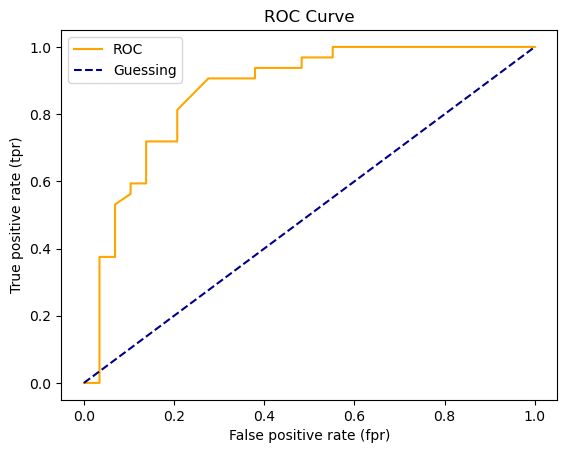

In [170]:
# Create a function for plotting ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [171]:
# ROC AUC scors
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

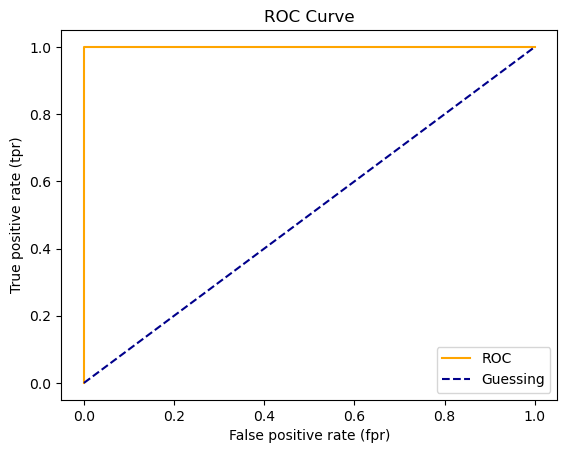

In [172]:
# Plot perfect ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [173]:
# 3. Confusion matrix

from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [174]:
# Visualize confusion matrix with pc.crosstab()
pd.crosstab(y_test, y_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [175]:
23+7+4+27

61

In [176]:
len(X_test)

61

In [177]:
# Install conda package seaborn in our current environment from jupyter notebook
# import sys
# %conda install --yes --prefix {sys.prefix} seaborn

<Axes: >

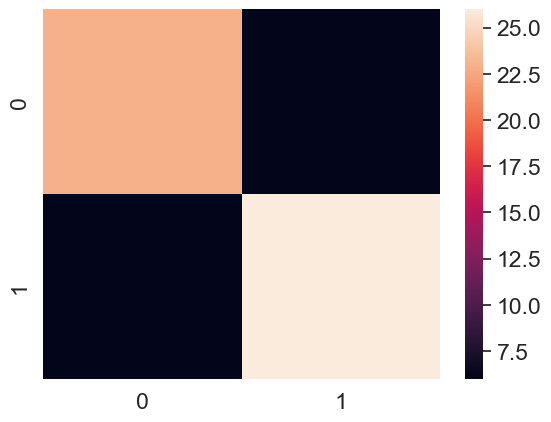

In [178]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using seaborn
sns.heatmap(conf_mat)

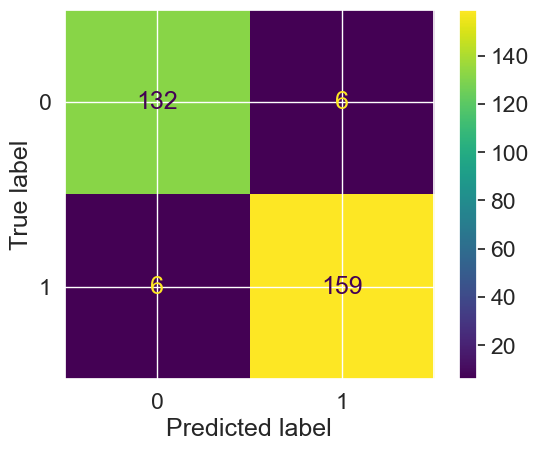

In [179]:
# 3. Confusion matrix (new methods)
# Using new methods of creating a confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X, y)

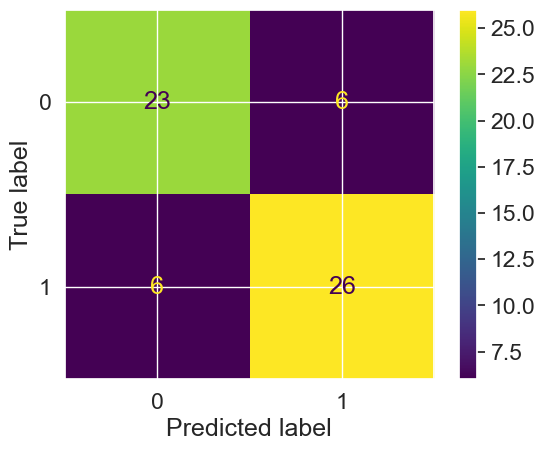

In [180]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

In [181]:
# 4. Classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



### 4.3 Regression model evaluation metrics →
#### 1. R^2 (pronounced r-squared) or coefficient of determination
#### 2. Mean absolute error (MAE)
#### 3. Mean squared error (MSE)

In [182]:
# 1. R^2 Score (coefficient of determination)

from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Calculate the models R^2 score
model.score(X_test, y_test)

0.8065734772187598

In [183]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

# Outside of the score() function, R^2 can be calculated using Scikit-Learn's r2_score() function.
# A model which only predicted the mean would get a score of 0.
r2_score(y_test, y_test_mean)

# And a perfect model would get a score of 1.
r2_score(y_test, y_test)

1.0

In [184]:
# 2. Mean Absolute Error (MAE)

from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [185]:
df = pd.DataFrame(data={"Actual values": y_test, "Predicted values": y_preds})
df["differences"] = df["Predicted values"] - df["Actual values"]
df.head()

,Actual values,Predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240


In [186]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.32659871732073664

In [187]:
# 3. Mean squared error (MSE)

from sklearn.metrics import mean_squared_error
y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [188]:
df["squared differences"] = np.square(df["differences"])
df.head()

,Actual values,Predicted values,differences,squared differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [189]:
# Calculate by hand
squared = np.square(df["differences"]).mean()
squared

0.2534678520824551

### 4.4 Evaluating with scoring parameter →

In [190]:
# Using scoring parameter on classification problems

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
clf = RandomForestClassifier()

# Cross-validated accuracy
# If scoring=None, estimator's default scoring evaluation metric is used, which is accuracy for classification models
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [191]:
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [192]:
# Cross-validated precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [193]:
print(f"The cross-validated precision is: {np.mean(cv_precision)}")

The cross-validated precision is: 0.8329547346025924


In [194]:
# Cross-validated recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [195]:
print(f"The cross-validated recall is: {np.mean(cv_recall)}")

The cross-validated recall is: 0.8545454545454545


In [196]:
# Using scoring parameter on regression problems

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]
model = RandomForestRegressor()

# Cross-validated r2
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)
cv_r2

array([0.51682388, 0.70279716, 0.74197717, 0.61638204, 0.68243183])

In [197]:
np.mean(cv_r2)

0.6520824166120266

In [198]:
# Cross-validated mean squared error
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
cv_mse

array([-0.51296289, -0.35070541, -0.37298376, -0.44907837, -0.46924468])

In [199]:
np.mean(cv_mse)

-0.43099502243995547

In [200]:
# Cross-validated mean absolute error
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae

array([-0.54535682, -0.405814  , -0.43474105, -0.46311862, -0.47328158])

In [201]:
np.mean(cv_mae)

-0.46446241455910864

### 4.5 Evaluating with metric functions →

In [202]:
# Evaluating classification models

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Set seed
np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make prediction
y_preds = clf.predict(X_test)

# Evaluating model using evaluation metric functions
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Accuracy: {precision_score(y_test, y_preds)}")
print(f"Accuracy: {recall_score(y_test, y_preds)}")
print(f"Accuracy: {f1_score(y_test, y_preds)}")

Accuracy: 85.25%
Accuracy: 0.8484848484848485
Accuracy: 0.875
Accuracy: 0.8615384615384616


In [203]:
# Evaluating regression models

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Set seed
np.random.seed(42)

# Create X & y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluating model using evaluation metric functions
print(f"Accuracy: {r2_score(y_test, y_preds)}")
print(f"MEA - mean absolute error: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE - mean squared error: {mean_squared_error(y_test, y_preds)}")

Accuracy: 0.8065734772187598
MEA - mean absolute error: 0.32659871732073664
MSE - mean squared error: 0.2534678520824551


# 5. Improving the model

In [204]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

In [205]:
# Making a function for evaluation
def evaluate_preds(y_true: np.array, 
                   y_preds: np.array) -> dict:
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.

    Returns several metrics in the form of a dictionary.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [255]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffling data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

# Create model instance
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate model on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


In [257]:
# We're going to adjust:
# max_depth
# max_features
# min_samples_leaf
# min_samples_split
# n_estimators

In [261]:
# Creating a classifier with different hyperparameters

np.random.seed(42)
clf_2 = RandomForestClassifier(n_estimators=150)
clf_2.fit(X_train, y_train)

y_preds_2 = clf_2.predict(X_valid)
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 95.56%
Precision: 0.93
Recall: 1.00
F1 score: 0.96


### 5.2 Tuning hyperparameters using RandomizedSearchCV

In [262]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Create X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create instance of the model 
# n_jobs is used to modify the number of cores allocated to the model, none/1 = 1 single core
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
# n_iter is the number of iterations of training the model with different values
rs_clf = RandomizedSearchCV(estimator=clf, param_distributions=grid, n_iter=10, cv=5, verbose=2)

# Fit model
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

c:\Users\Admin\Desktop\dev-aakash\ai\sample_ai_project\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\dev-aakash\ai\sample_ai_project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Admin\Desktop\dev-aakash\ai\sample_ai_project\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Admin\Desktop\dev-aakash\ai\sample_ai_project\env\Lib\site-packages

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [263]:
# Get the best performing params/hyperparameters
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [264]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


### 5.3 Tuning hyperparameters using GridSearchCV

In [265]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [266]:
# By default GridSearchCV will calculate(in our defined grid):
# Product of all defined hyperparameter * Product of cross validation sets defined and n_iter iterations defined
6*5*2*3*3*50

27000

In [267]:
from sklearn.model_selection import GridSearchCV, train_test_split

grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

np.random.seed(42)

# Create X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create instance of the model 
# n_jobs is used to modify the number of cores allocated to the model, none/1 = 1 single core
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
# it does not take n_iter, as it is a brute force method for getting the best hyperparameters
gs_clf = GridSearchCV(estimator=clf, param_grid=grid_2, cv=5, verbose=2)

# Fit model
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

c:\Users\Admin\Desktop\dev-aakash\ai\sample_ai_project\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\dev-aakash\ai\sample_ai_project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Admin\Desktop\dev-aakash\ai\sample_ai_project\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Admin\Desktop\dev-aakash\ai\sample_ai_project\env\Lib\site-packages

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [268]:
# Get the best performing params/hyperparameters
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [269]:
# Make predictions
gs_y_preds = clf_2.predict(X_test)

# Evaluate predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 81.97%
Precision: 0.76
Recall: 0.89
F1 score: 0.82


<Axes: >

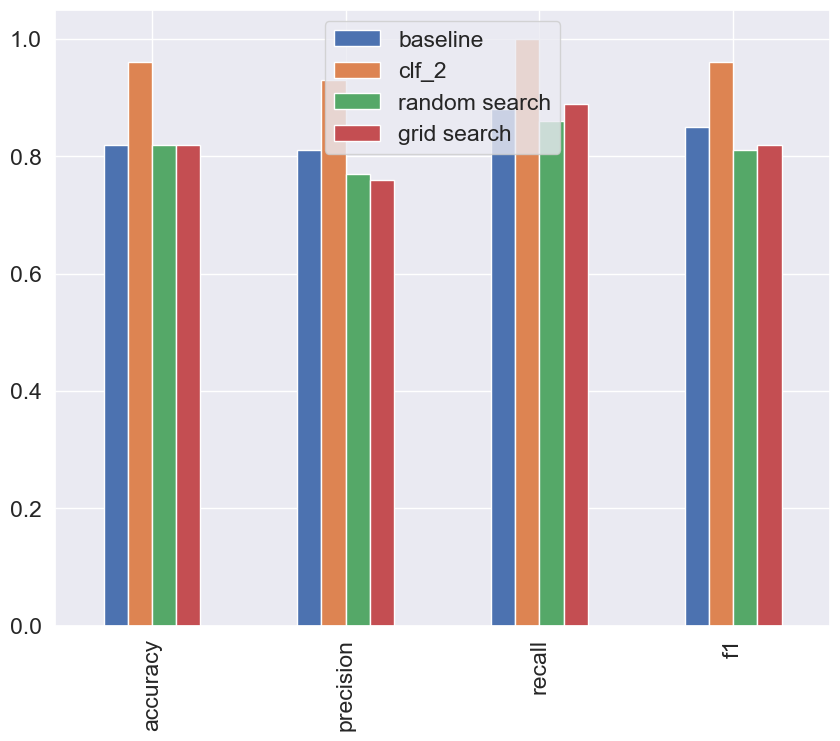

In [270]:
# Comparing different model metrics

compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10,8))

# 6. Saving and loading trained machine learning models

In [271]:
# Two ways to save and load machine learning models:
# 1. with python’s pickle module
# 2. with the joblib module

### 6.1 Pickle

In [275]:
import pickle

# Save the model to models directory
pickle.dump(gs_clf, open("models/gs_random_forest_model_1.pkl", "wb"))

In [276]:
# Load a saved model
loaded_pickle_model = pickle.load(open("models/gs_random_forest_model_1.pkl", "rb"))